# Explore here

                                      name  duration  popularity       artist
0              The Trooper - 2015 Remaster  4.212217          72  Iron Maiden
1         Run to the Hills - 2015 Remaster  3.891767          70  Iron Maiden
2         Fear of the Dark - 2015 Remaster  7.302000          69  Iron Maiden
3  The Number of the Beast - 2015 Remaster  4.843100          66  Iron Maiden
4     Hallowed Be Thy Name - 2015 Remaster  7.184883          65  Iron Maiden
5             Wasted Years - 2015 Remaster  5.160667          64  Iron Maiden
6    2 Minutes to Midnight - 2015 Remaster  6.059767          62  Iron Maiden
7                Aces High - 2015 Remaster  4.531767          61  Iron Maiden
8             Wasting Love - 2015 Remaster  5.850433          60  Iron Maiden
Figure(640x480)


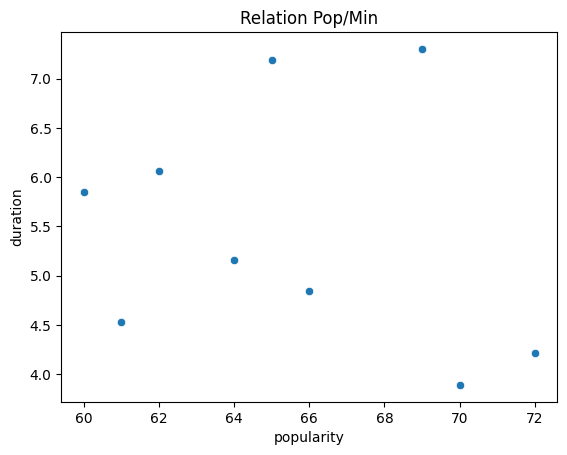

In [13]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")

# Conect to Spotify
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

#Request to Spotify
# 6mdiAmATAx73kdxrNrnlao <-Iron Maiden

response = sp.artist_top_tracks(artist_id="6mdiAmATAx73kdxrNrnlao")

names = [response["tracks"][i]["name"] for i in range(9)]
duration = [response["tracks"][i]["duration_ms"] for i in range(9)]
duration = [i / 60000 for i in duration] #convertimos los milisegundos a minutos 1000 mseg = 1 seg, 60 seg = 1 min
popularity = [response["tracks"][i]["popularity"] for i in range(9)]
artists = [response["tracks"][i]["artists"][0]["name"] for i in range(9)]

tracks_dict = {"name" : names, "duration" : duration, "popularity" : popularity, "artist" : artists}

#Convert Dict to Dataframe

tracks = pd.DataFrame(tracks_dict).sort_values("popularity", ascending = False)

#Analize Data

graf = sns.scatterplot(data = tracks, x = "popularity", y = "duration").set_title("Relation Pop/Min")
figure = graf.get_figure()

print (tracks)
print(figure)



Si bien es cierto que las dos primeras canciones con más popularidad el tercer puesto es la que cancion que dura más. Los datos son muy dispersos y la muestra es muy pequeña como para poder afirmar que hay una correlación entre popularidad.